In [1]:
import json
import requests
import matplotlib.pyplot as plt
from api_keys import key
from citipy import citipy
import random
import requests
from pprint import pprint
from datetime import datetime
from pytz import timezone
import numpy as np
from glob import glob
import re

In [2]:
lat_r = (-90, 90) # South to North
long_r = (-180, 180) # West to East

In [3]:
# randomly generate 500 geocoords and map to city names
lat_l = []
long_l = []
random.seed(0)
for i in range(2000):
    lat_l.append(random.uniform(lat_r[0], lat_r[1]))
    long_l.append(random.uniform(long_r[0], long_r[1]))

cities_geo = list(zip(lat_l, long_l))
# print(cities_geo)

cities = []
c = 0    # count non duplicate cities
for coords in cities_geo:
    name = citipy.nearest_city(coords[0], coords[1]).city_name
    
    if name not in cities:
        cities.append(name)
        
        c += 1
            
    if c == 1000:
        break
         
print(cities[:5], len(cities))

['severo-yeniseyskiy', 'huarmey', 'aquiraz', 'saint-ambroise', 'makamba'] 763


In [4]:
# ping api and make csv once for list of cities and current day
def make_city_weather(cities, Ymd=datetime.now(tz=timezone('America/New_York')).strftime("%Y%m%d")):
    with open(rf'Resources/cities_weather_{Ymd}.csv', 'w') as fw:
        url = rf'http://api.openweathermap.org/data/2.5/weather?q={{}}&appid={key}&units=imperial'
        d = 0
        
        print('city,lat,temp,humid,cloud,windsp', file=fw)
        for city in cities:
            url_city = url.format(city)
#             print(url_city)
            
            r = requests.get(url_city)
            dicy = r.json()
#             pprint(dicy)
            
            try:
                lat = dicy['coord']['lat']

                temp = dicy['main']['temp']     
                humid = dicy['main']['humidity']
                cloud = dicy['clouds']['all']
                windsp = dicy['wind']['speed']
            except:
                print(f'city {city} ERROR... records {d} of 500')
            else:
                d += 1

                print(f'{city},{lat},{temp},{humid},{cloud},{windsp}', file=fw)
                print(f'city {city} found... records {d} of 500')

            if d == 500:
                break

# UNCOMMENT to generate file for current day
############################################################
# make_city_weather(cities)
############################################################

In [5]:
lat_l = []

temp_l = []
humid_l = []
cloud_l = []
windsp_l = []


# Automatically extract latest file
latest_file = glob('Resources/cities_weather_*.csv')[-1]
print(f'extracting from {latest_file}...')
date = re.search(r'\d+', latest_file).group()
date = datetime.strptime(date, '%Y%m%d').strftime('%m-%d-%Y')

with open(latest_file, 'r') as fr:
    next(fr)
    
    for line in fr:
        line = line.strip()
        tmp = line.split(',')
#         print(tmp)
    
        lat = float(tmp[1])
        
        temp = float(tmp[2])
        humid = float(tmp[3])
        cloud = float(tmp[4])
        windsp = float(tmp[5])
        
        lat_l.append(lat)
        
        temp_l.append(temp)
        humid_l.append(humid)
        cloud_l.append(cloud)
        windsp_l.append(windsp)

        
print()
print(lat_l[:5], len(lat_l))
print()
print(temp_l[:5], len(temp_l))
print(humid_l[:5], len(humid_l))
print(cloud_l[:5], len(cloud_l))
print(windsp_l[:5], len(windsp_l))

extracting from Resources\cities_weather_20211023.csv...

[60.3725, -10.0681, -3.9014, 48.5501, -4.1348] 500

[31.98, 64.06, 82.49, 35.06, 65.57] 500
[96.0, 85.0, 79.0, 87.0, 72.0] 500
[100.0, 38.0, 8.0, 100.0, 33.0] 500
[14.63, 10.8, 10.74, 3.44, 2.3] 500


Temperature rises towards the equator, with the Southern cities being warmer possibly due to the bottom of Earth tilting towards the Sun.

Graph: Inverted V


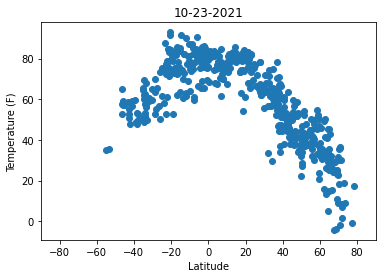

In [6]:
print("""\
Temperature rises towards the equator, \
with the Southern cities being warmer possibly due to the bottom of Earth tilting towards the Sun.

Graph: Inverted V""")


plt.scatter(lat_l, temp_l)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(lat_r)

plt.show()

Cities near to the equator only have high humidity possibly due to short distance from the Sun.

Graph: slightly inverted V


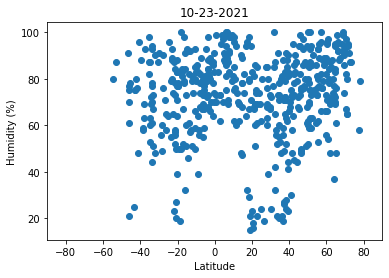

In [7]:
print("""\
Cities near to the equator only have high humidity possibly due to short distance from the Sun.

Graph: slightly inverted V""")

plt.scatter(lat_l, humid_l)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(lat_r)

plt.show()

No clear relationship between cloudiness and where city is located. This is logically given the sky can hold same amount of water anywhere on Earth just that cities near the equator has more evaporation in the air.
 
Graph: Scattered


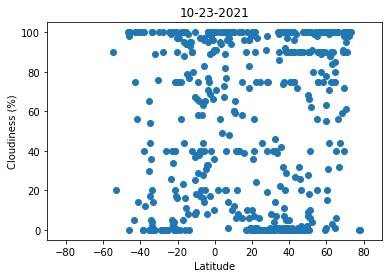

In [8]:
print("""\
No clear relationship between cloudiness and where city is located. This is logically given the sky can hold same amount of water\
 anywhere on Earth just that cities near the equator has more evaporation in the air.
 
Graph: Scattered""")

plt.scatter(lat_l, cloud_l)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(lat_r)

plt.show()

The most extreme wind speeds occur further away from the equator. Less surface wind near the equater due to hot air rising also giving rise to doldrums where ships get stuck.

Graph: slightly V


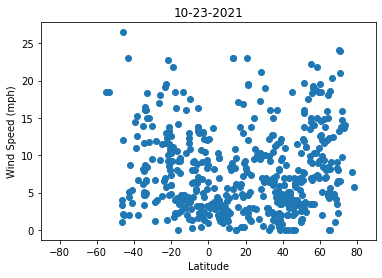

In [9]:
print("""\
The most extreme wind speeds occur further away from the equator. Less surface wind near the equater due to hot air rising also\
 giving rise to doldrums where ships get stuck.

Graph: slightly V""")


plt.scatter(lat_l, windsp_l)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(lat_r)

plt.show()

In [10]:
# separate all data into north and south hemispheres
# create new vars of empty lists
for prefix in ('lat', 'temp', 'humid', 'cloud', 'windsp'):
    for suffix in ['ln', 'ls']:
        globals()[f'{prefix}_{suffix}'] = []
        
# for k in lat_l:
#     if k >= 0 and k <= 6:
#         print(k)

g = 0
# assign into North and South lists
for ind_l in ('temp_l', 'humid_l', 'cloud_l', 'windsp_l'):
    for i, j in zip(lat_l, globals()[ind_l]):
        if i >= 0:
            if g == 0:
                lat_ln.append(i)
            else:
                pass

            globals()[f'{ind_l}n'].append(j)
        else:    
            if g == 0:
                lat_ls.append(i)
            else:
                pass

            globals()[f'{ind_l}s'].append(j)
    
    g += 1

for prefix in ('lat', 'temp', 'humid', 'cloud', 'windsp'):
    for suffix in ['ln', 'ls']:
        print('{}: {} records'.format(f'{prefix}_{suffix}', len(globals()[f'{prefix}_{suffix}'])))
        
    print()

lat_ln: 325 records
lat_ls: 175 records

temp_ln: 325 records
temp_ls: 175 records

humid_ln: 325 records
humid_ls: 175 records

cloud_ln: 325 records
cloud_ls: 175 records

windsp_ln: 325 records
windsp_ls: 175 records



slope: -0.9100501325348476

Slope is negative showing temperature drops as cities go up North from equator.


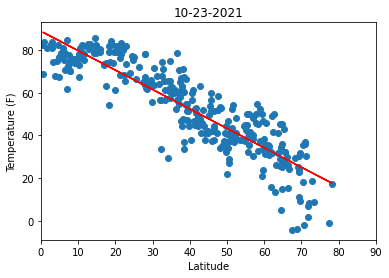

In [11]:
plt.scatter(lat_ln, temp_ln)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim([0, lat_r[1]])

def reg_plot(x_l, y_l):
    x = np.array(x_l)
    y = np.array(y_l)

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red')
    
    return m, b

corr = reg_plot(lat_ln, temp_ln)
print(f'slope: {corr[0]}')
print("""
Slope is negative showing temperature drops as cities go up North from equator.""")   

plt.show()

slope: 0.663831336199202

Slope is positive showing temperature rises as cities from South to equator.


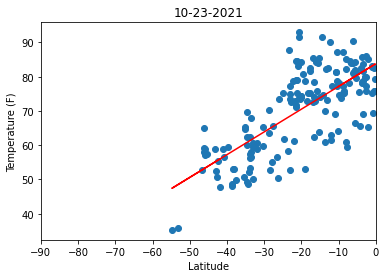

In [12]:
plt.scatter(lat_ls, temp_ls)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim([lat_r[0], 0])

corr = reg_plot(lat_ls, temp_ls)
print(f'slope: {corr[0]}')
print("""
Slope is positive showing temperature rises as cities from South to equator.""")   

plt.show()

slope: 0.09452164756741595

Slope is slightly positive showing humdity slightly rises as cities go up North from equator.


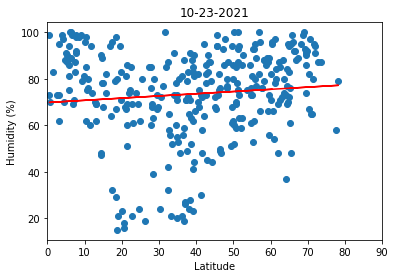

In [13]:
plt.scatter(lat_ln, humid_ln)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim([0, lat_r[1]])

corr = reg_plot(lat_ln, humid_ln)
print(f'slope: {corr[0]}')
print("""
Slope is slightly positive showing humdity slightly rises as cities go up North from equator.""")  

plt.show()

slope: 0.14594190622943634

Slope is slightly positive showing humdity slightly rises as cities go from South to equator.


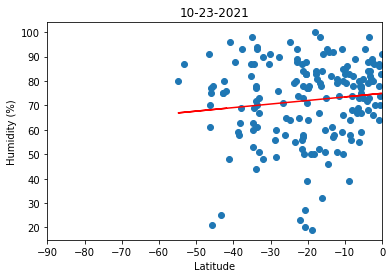

In [14]:
plt.scatter(lat_ls, humid_ls)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim([lat_r[0], 0])

corr = reg_plot(lat_ls, humid_ls)
print(f'slope: {corr[0]}')
print("""
Slope is slightly positive showing humdity slightly rises as cities go from South to equator.""")  

plt.show()

slope: 0.30282169912890755

Slope is actually positive showing cloudiness rises as cities go up North from equator.


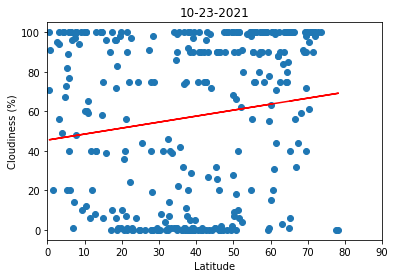

In [15]:
plt.scatter(lat_ln, cloud_ln)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim([0, lat_r[1]])

corr = reg_plot(lat_ln, cloud_ln)
print(f'slope: {corr[0]}')
print("""
Slope is actually positive showing cloudiness rises as cities go up North from equator.""")  

plt.show()

slope: 0.2648599670914829

Slope is actually positive showing cloudiness rises as cities go from South to equator.


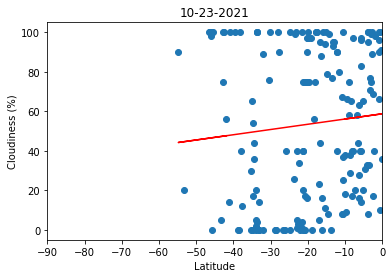

In [16]:
plt.scatter(lat_ls, cloud_ls)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim([lat_r[0], 0])

corr = reg_plot(lat_ls, cloud_ls)
print(f'slope: {corr[0]}')
print("""
Slope is actually positive showing cloudiness rises as cities go from South to equator.""")  

plt.show()

slope: 0.07557412001000294

Slope is actually positive showing wind speed rises as cities go up North from equator.


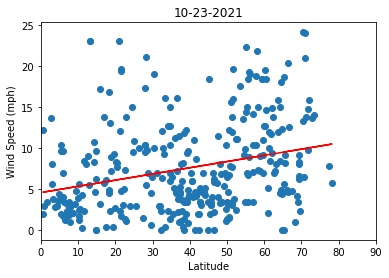

In [19]:
plt.scatter(lat_ln, windsp_ln)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim([0, lat_r[1]])

corr = reg_plot(lat_ln, windsp_ln)
print(f'slope: {corr[0]}')
print("""
Slope is actually positive showing wind speed rises as cities go up North from equator.""")  

plt.show()

slope: -0.08439034181937798

Slope is actually positive showing cloudiness rises as cities go from South to equator.


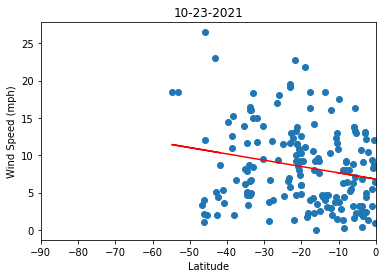

In [20]:
plt.scatter(lat_ls, windsp_ls)
plt.title(date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim([lat_r[0], 0])

corr = reg_plot(lat_ls, windsp_ls)
print(f'slope: {corr[0]}')
print("""
Slope is actually positive showing wind speed decreases as cities go from South to equator.""")  

plt.show()